The goal of this notebook is to provide a prototype of a system that can classify the toasting level of bread. The system will be based on the color of the bread, which will be represented in the CIEL*a*b* color space.


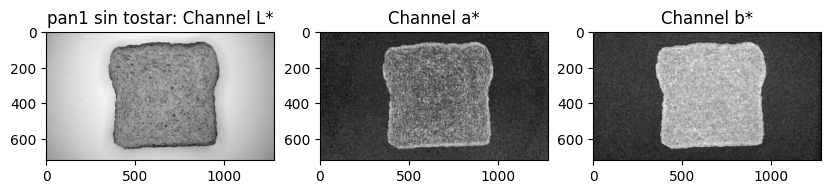

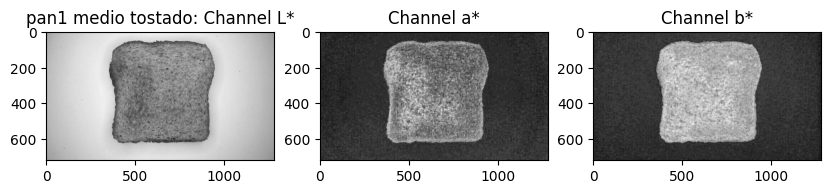

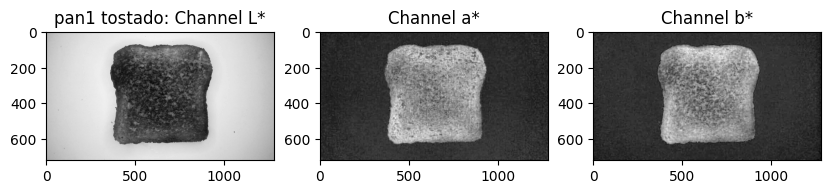

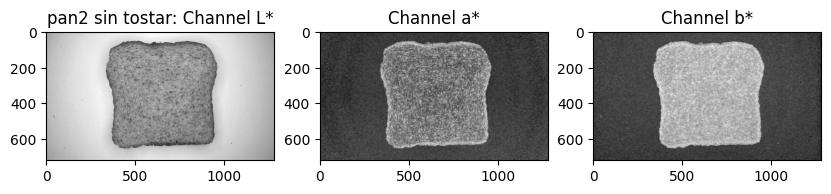

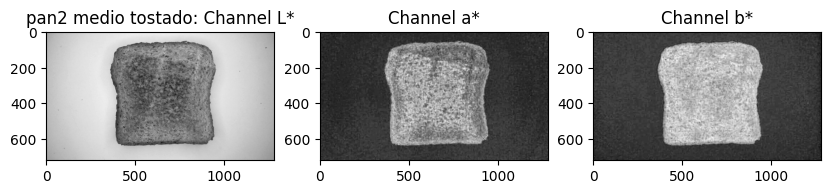

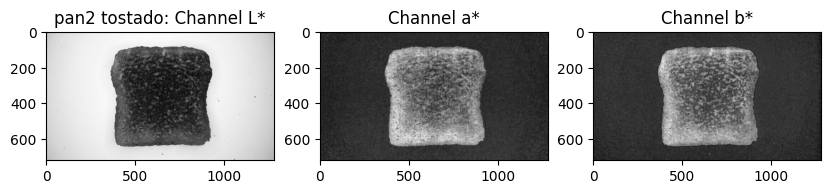

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def l2_distance(pan1, pan2):
    return np.linalg.norm(cv2.absdiff(pan1, pan2))
    
def cielab_from(img_path):
    image = cv2.imread('toasted_bread_dataset/' + img_path)
    img_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
    l_channel, a_channel, b_channel = cv2.split(img_lab)
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 3, 1)
    plt.imshow(l_channel, cmap='gray')
    plt.title(img_path.split('.')[0] + ': Channel L*')
    
    plt.subplot(1, 3, 2)
    plt.imshow(a_channel, cmap='gray')
    plt.title('Channel a*')
    
    plt.subplot(1, 3, 3)
    plt.imshow(b_channel, cmap='gray')
    plt.title('Channel b*')
    
    plt.show()
    
    return img_lab
    
reference_not_toasted_bread = cielab_from('pan1 sin tostar.jpg')
reference_medium_toasted_bread = cielab_from('pan1 medio tostado.jpg')
reference_very_toasted_bread = cielab_from('pan1 tostado.jpg')

not_toasted_bread = cielab_from('pan2 sin tostar.jpg')
medium_toasted_bread = cielab_from('pan2 medio tostado.jpg')
very_toasted_bread = cielab_from('pan2 tostado.jpg')

all_breads = [reference_not_toasted_bread, reference_medium_toasted_bread, reference_very_toasted_bread, not_toasted_bread, medium_toasted_bread, very_toasted_bread]

In [8]:
n = len(all_breads)
differences_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(i+1, n):
        diff1 = l2_distance(all_breads[i], all_breads[j])
        diff2 = l2_distance(all_breads[j], all_breads[i])
        differences_matrix[i, j] = diff1
        differences_matrix[j, i] = diff2

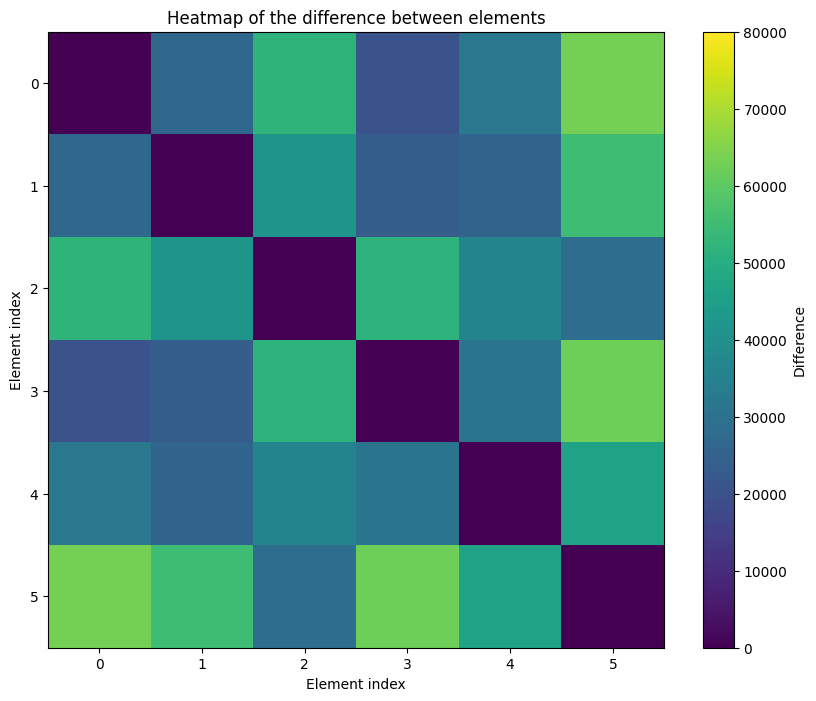

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.imshow(differences_matrix, interpolation='nearest', vmin=0, vmax=80000)

cbar = fig.colorbar(cax, ax=ax)
cbar.set_label('Difference')

ax.set_title('Heatmap of the difference between elements')
ax.set_xlabel('Element index')
ax.set_ylabel('Element index')

ax.set_xticks(np.arange(len(differences_matrix)))
ax.set_yticks(np.arange(len(differences_matrix)))

plt.show()

In [10]:
all_breads = [reference_not_toasted_bread, reference_medium_toasted_bread, reference_very_toasted_bread, not_toasted_bread, medium_toasted_bread, very_toasted_bread]
images_paths = ["pan_de_referencia_sin_tostar", "pan_de_referencia_medio_tostado", "pan_de_referencia_tostado", "pan2_sin_tostar", "pan2_medio_tostado", "pan2_tostado"]
for i in range(len(differences_matrix)):
    min_value, min_index = min((value, index) for index, value in enumerate(differences_matrix[i]) if value != 0)
    print(min_value, images_paths[i], images_paths[min_index])


20484.741980313054 pan_de_referencia_sin_tostar pan2_sin_tostar
23588.86082455022 pan_de_referencia_medio_tostado pan2_sin_tostar
28901.400277495206 pan_de_referencia_tostado pan2_tostado
20484.741980313054 pan2_sin_tostar pan_de_referencia_sin_tostar
25647.96368135295 pan2_medio_tostado pan_de_referencia_medio_tostado
28901.400277495206 pan2_tostado pan_de_referencia_tostado


## Color histogram

In [11]:
def show_histogram_one_image_all_channels(image_name):
    l_channel, a_channel, b_channel = cv2.split(image_name)

    histSize = [256]
    histRange = [0, 256]
    accumulate = False
    
    l_hist = cv2.calcHist([l_channel], [0], None, histSize, histRange, accumulate=accumulate)
    a_hist = cv2.calcHist([a_channel], [0], None, histSize, histRange, accumulate=accumulate)
    b_hist = cv2.calcHist([b_channel], [0], None, histSize, histRange, accumulate=accumulate)
    
    plt.figure()
    plt.title("Color Histograms in CIEL*a*b* Space")
    plt.xlabel("Bin")
    plt.ylabel("# of Pixels")
    plt.plot(l_hist, color='black', label='L* Channel')
    plt.plot(a_hist, color='green', label='a* Channel')
    plt.plot(b_hist, color='blue', label='b* Channel')
    plt.legend()

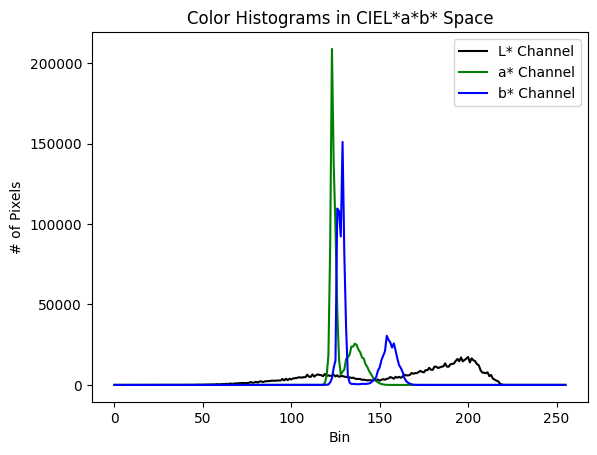

In [12]:
show_histogram_one_image_all_channels(reference_medium_toasted_bread)

In [13]:
def show_histogram_all_images_one_channel(image_paths, channel_index):
    colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']
    plt.figure()
    plt.title("Histograms for Multiple Images for channel " + str(channel_index))
    plt.xlabel("Bin")
    plt.ylabel("# of Pixels")
    
    for idx, image_path in enumerate(image_paths):
        image = cv2.imread(image_path)
        channel = cv2.split(image)[channel_index]
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])
        histogram = histogram / np.max(histogram)
        plt.plot(histogram, color=colors[idx % len(colors)], label=image_path.split('/')[-1])
    
    plt.legend()
    plt.xlim([0, 256])
    plt.show()

In [14]:
import os
root_images_dir = 'toasted_bread_dataset/'
dataset_paths = [root_images_dir + image_path for image_path in os.listdir(root_images_dir)]
dataset_paths

['toasted_bread_dataset/pan1 medio tostado.jpg',
 'toasted_bread_dataset/pan2 medio tostado.jpg',
 'toasted_bread_dataset/pan2 sin tostar.jpg',
 'toasted_bread_dataset/pan1 sin tostar.jpg',
 'toasted_bread_dataset/pan2 tostado bis.jpg',
 'toasted_bread_dataset/pan1 tostado.jpg',
 'toasted_bread_dataset/pan1 tostado bis.jpg',
 'toasted_bread_dataset/pan2 tostado.jpg']

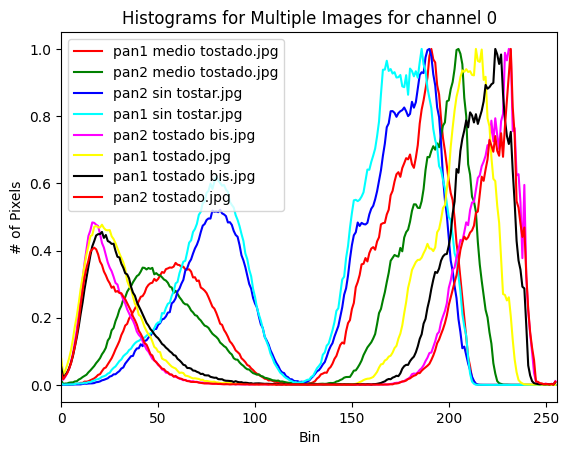

In [15]:
show_histogram_all_images_one_channel(dataset_paths, 0)

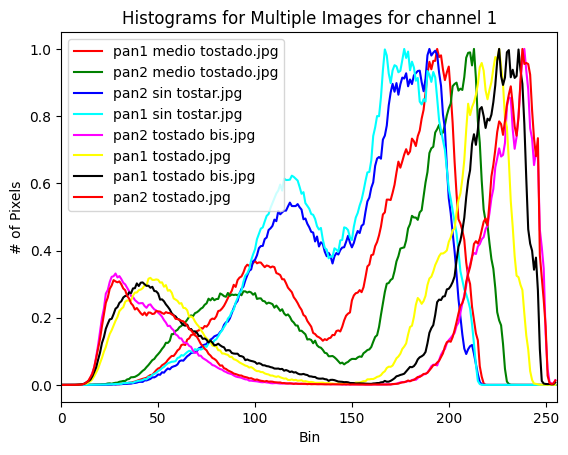

In [16]:
show_histogram_all_images_one_channel(dataset_paths, 1)

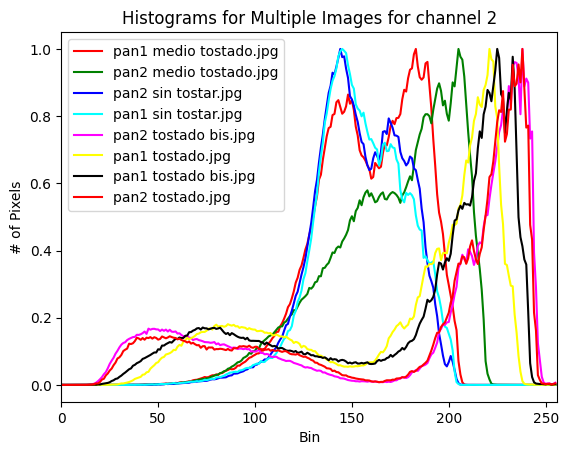

In [17]:
show_histogram_all_images_one_channel(dataset_paths, 2)

So the plan is to detect the edge of the bread, and then take the histogram of the L channel of the bread.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('./datasetpantostado/pan1mediotostado.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Detect edges using Canny
edges = cv2.Canny(blurred, 20, 300)

# Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_img = image.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

x_min = min([c[:, 0, 0].min() for c in contours])
y_min = min([c[:, 0, 1].min() for c in contours])
x_max = max([c[:, 0, 0].max() for c in contours])
y_max = max([c[:, 0, 1].max() for c in contours])

# Expand the bounding box by 10 pixels on each side
x_min -= 5
y_min -= 5
x_max += 5
y_max += 5

# Ensure the bounding box is within image bounds
x_min = max(0, x_min)
y_min = max(0, y_min)
x_max = min(image.shape[1], x_max)
y_max = min(image.shape[0], y_max)

# Crop the image
cropped_image = image[y:y+h, x:x+w]
cropped_image = image[y_min-3:y_max+3, x_min-3:x_max+3]

# Show each result
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Blurred Image
plt.subplot(2, 3, 2)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

# Edge-detected Image
plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edges Detected')
plt.axis('off')

# Contours on Original Image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Contours on Original')
plt.axis('off')

# Contours only
contour_img_blank = np.zeros_like(image)
cv2.drawContours(contour_img_blank, contours, -1, (255, 255, 255), 2)
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(contour_img_blank, cv2.COLOR_BGR2RGB))
plt.title('Contours only')
plt.axis('off')

# Cropped Image
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')
plt.axis('off')

plt.tight_layout()
plt.show()

In [38]:
def edge_detection(img_path):
    image = cv2.imread(img_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    edges = cv2.Canny(blurred, 20, 300)
    return edges

In [39]:
def show_edge_detection(image):
    edges = edge_detection(image)
    plt.figure()
    plt.title("Edge Detection")
    plt.imshow(edges, cmap='gray')
    plt.show()

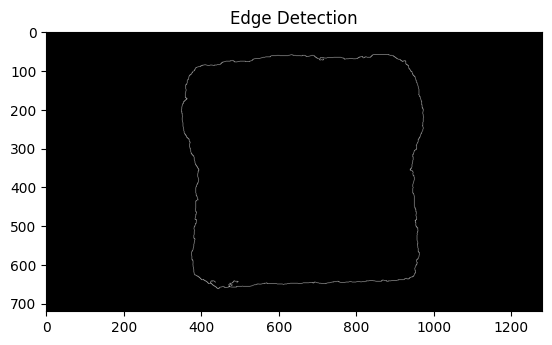

In [40]:
show_edge_detection('toasted_bread_dataset/pan1 sin tostar.jpg')

6.6039085

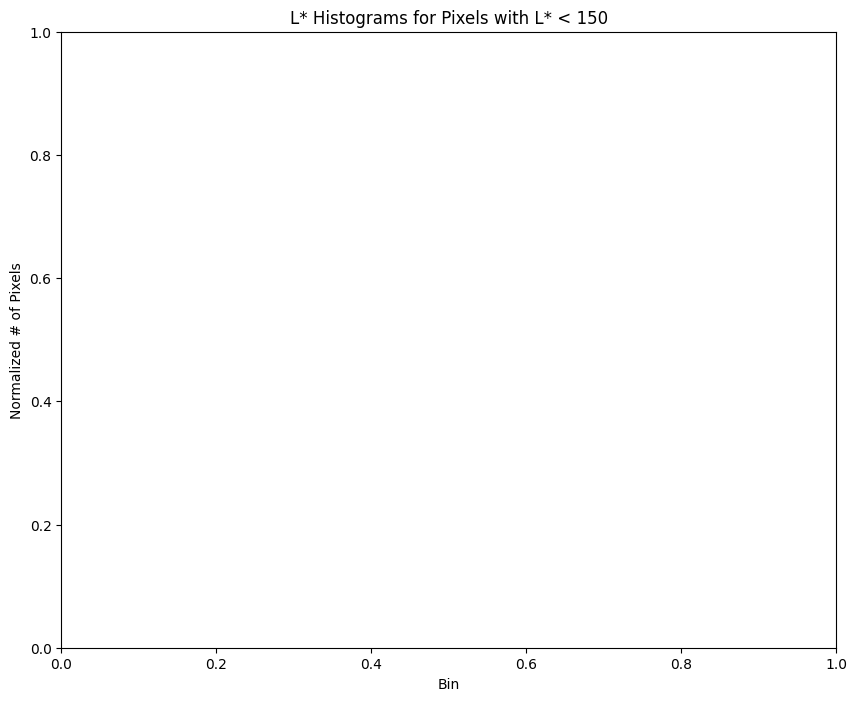

In [18]:
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black']

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
plt.title("L* Histograms for Pixels with L* < 150")
plt.xlabel("Bin")
plt.ylabel("Normalized # of Pixels")

def tuvieja(image_lab):
    # Split the channels
    l_channel, a_channel, b_channel = cv2.split(image_lab)
    # Create a mask for pixels with L* value below 150
    mask = l_channel < 150
    l_channel_filtered = np.zeros_like(l_channel)
    l_channel_filtered[mask] = l_channel[mask]

    # Ahora, aplicamos la misma máscara a los canales a* y b*
    a_channel_filtered = np.zeros_like(a_channel)
    b_channel_filtered = np.zeros_like(b_channel)
    
    # Usamos la máscara para filtrar los canales a* y b*
    a_channel_filtered[mask] = a_channel[mask]
    b_channel_filtered[mask] = b_channel[mask]

    # Compute the histogram for the L* channel using the mask
    l_hist_masked = cv2.calcHist([l_channel_filtered], [0], mask.astype(np.uint8), [256], [0, 256])
    # Normalize the histogram (optional)
    l_hist_masked = l_hist_masked / np.max(l_hist_masked)

    # Compute the histogram for the L* channel using the mask
    a_hist_masked = cv2.calcHist([a_channel_filtered], [0], mask.astype(np.uint8), [256], [0, 256])
    # Normalize the histogram (optional)
    a_hist_masked = a_hist_masked / np.max(a_hist_masked)

    # Compute the histogram for the L* channel using the mask
    b_hist_masked = cv2.calcHist([b_channel_filtered], [0], mask.astype(np.uint8), [256], [0, 256])
    # Normalize the histogram (optional)
    b_hist_masked = b_hist_masked / np.max(b_hist_masked)

    return l_hist_masked, a_hist_masked, b_hist_masked

l, a, b = tuvieja(reference_not_toasted_bread)
l1, a1, b1 = tuvieja(reference_very_toasted_bread)
l2_distance(l, l1)